<a href="https://colab.research.google.com/github/Rohith2003664333/NLP-proj/blob/main/cars_price_prediction_linear_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [162]:
df=pd.read_csv('cars.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


# Simple linear regression

In [13]:
df=df.drop(['Brand','Model','Fuel_Type','Transmission','Owner_Type',],axis=1)

In [14]:
df.corr()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Car_ID,1.000000,0.059904,-0.227442,0.026140,-0.027965,0.027637,-0.021582,0.037105
Year,0.059904,1.000000,-0.741176,0.213177,-0.355122,-0.249446,-0.252598,-0.232687
Kilometers_Driven,-0.227442,-0.741176,1.000000,-0.104437,0.112340,-0.026732,0.396443,-0.051104
Mileage,0.026140,0.213177,-0.104437,1.000000,-0.680949,-0.648894,-0.194581,-0.595252
Engine,-0.027965,-0.355122,0.112340,-0.680949,1.000000,0.805709,0.179179,0.714465
Power,0.027637,-0.249446,-0.026732,-0.648894,0.805709,1.000000,-0.102867,0.856620
Seats,-0.021582,-0.252598,0.396443,-0.194581,0.179179,-0.102867,1.000000,-0.000027
Price,0.037105,-0.232687,-0.051104,-0.595252,0.714465,0.856620,-0.000027,1.000000


In [26]:
x=df[['Power']]
y=df.iloc[:,-1].values

In [27]:
print(x)

    Power
0     108
1     140
2     395
3      74
4     194
..    ...
95    191
96    171
97    121
98    113
99     85

[100 rows x 1 columns]


In [24]:
print(y)

[[ 800000]
 [1000000]
 [2500000]
 [ 600000]
 [ 850000]
 [ 750000]
 [ 900000]
 [ 650000]
 [2200000]
 [2700000]
 [2300000]
 [2000000]
 [ 850000]
 [1600000]
 [ 850000]
 [ 650000]
 [1800000]
 [1900000]
 [3000000]
 [2500000]
 [1400000]
 [ 550000]
 [ 850000]
 [ 600000]
 [1200000]
 [1600000]
 [3200000]
 [2800000]
 [2700000]
 [2500000]
 [ 600000]
 [ 800000]
 [1300000]
 [ 700000]
 [ 750000]
 [ 500000]
 [2000000]
 [3500000]
 [4000000]
 [ 650000]
 [1500000]
 [ 450000]
 [ 500000]
 [ 700000]
 [ 850000]
 [1600000]
 [3000000]
 [3200000]
 [2400000]
 [1800000]
 [2700000]
 [ 550000]
 [ 500000]
 [ 700000]
 [ 650000]
 [2600000]
 [2800000]
 [2900000]
 [1400000]
 [ 750000]
 [ 850000]
 [ 600000]
 [1200000]
 [1600000]
 [3200000]
 [2800000]
 [2700000]
 [2500000]
 [ 600000]
 [ 800000]
 [1300000]
 [ 700000]
 [ 750000]
 [ 500000]
 [2000000]
 [3500000]
 [4000000]
 [ 650000]
 [1500000]
 [ 450000]
 [ 500000]
 [ 700000]
 [ 850000]
 [1600000]
 [3000000]
 [3200000]
 [2400000]
 [1800000]
 [2700000]
 [ 550000]
 [ 500000]

In [28]:
x=np.array(x).reshape(len(x),1)


In [29]:
y=y.reshape(len(y),1)

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc1=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
y_train=sc1.fit_transform(y_train)
y_test=sc1.transform(y_test)

In [32]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [35]:
y_hat=sc1.inverse_transform(lr.predict(x_test))

In [36]:
print(y_hat)

[[1501334.91259235]
 [1148582.50763044]
 [1522713.8462264 ]
 [1501334.91259235]
 [ 966861.57174097]
 [1052377.30627719]
 [1266166.64261774]
 [ 656867.03404718]
 [1854087.31755425]
 [1073756.23991125]
 [1918224.11845642]
 [ 924103.70447286]
 [ 710314.36813231]
 [1020308.90582611]
 [ 817209.03630259]
 [1993050.38617561]
 [3788880.81143623]
 [1052377.30627719]
 [1127203.57399639]
 [1266166.64261774]]


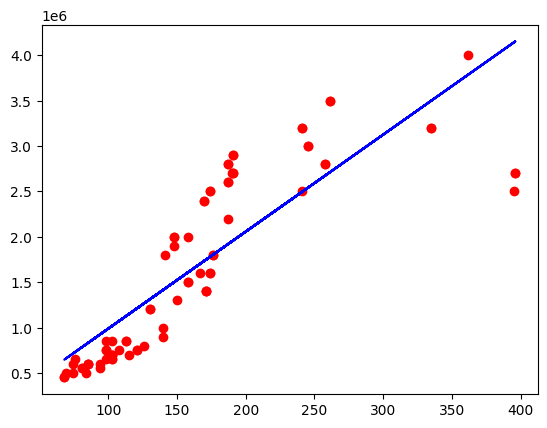

In [39]:
plt.scatter(sc.inverse_transform(x_train),sc1.inverse_transform(y_train),color='red')
plt.plot(sc.inverse_transform(x_train),sc1.inverse_transform(lr.predict(x_train)),color='blue')

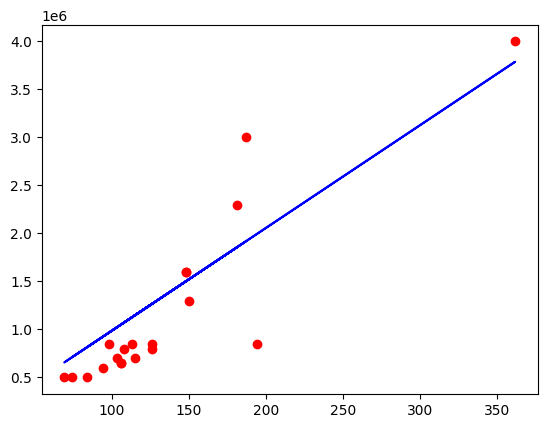

In [40]:
plt.scatter(sc.inverse_transform(x_test),sc1.inverse_transform(y_test),color='red')
plt.plot(sc.inverse_transform(x_test),y_hat,color='blue')

In [51]:
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(sc1.inverse_transform(y_train),sc1.inverse_transform(lr.predict(x_train))))

0.7162629045975091


In [52]:
print(r2_score(sc1.inverse_transform(y_test),sc1.inverse_transform(lr.predict(x_test))))

0.7403329516226447


In [58]:
print(mean_squared_error(sc1.inverse_transform(y_train),sc1.inverse_transform(lr.predict(x_train))))

279532466319.9953


In [62]:
print(y_hat)

[[1501334.91259235]
 [1148582.50763044]
 [1522713.8462264 ]
 [1501334.91259235]
 [ 966861.57174097]
 [1052377.30627719]
 [1266166.64261774]
 [ 656867.03404718]
 [1854087.31755425]
 [1073756.23991125]
 [1918224.11845642]
 [ 924103.70447286]
 [ 710314.36813231]
 [1020308.90582611]
 [ 817209.03630259]
 [1993050.38617561]
 [3788880.81143623]
 [1052377.30627719]
 [1127203.57399639]
 [1266166.64261774]]


In [64]:
print(sc1.inverse_transform(y_test))

[[1600000.]
 [ 700000.]
 [1300000.]
 [1600000.]
 [ 850000.]
 [ 650000.]
 [ 850000.]
 [ 500000.]
 [2300000.]
 [ 800000.]
 [3000000.]
 [ 600000.]
 [ 500000.]
 [ 700000.]
 [ 500000.]
 [ 850000.]
 [4000000.]
 [ 650000.]
 [ 850000.]
 [ 800000.]]


In [61]:
print(sc1.inverse_transform(lr.predict(x_train)))

[[1918224.11845642]
 [4152322.68321516]
 [2495455.3265759 ]
 [ 656867.03404718]
 [1266166.64261774]
 [ 966861.57174097]
 [1608229.58076262]
 [1747192.64938398]
 [1950292.5189075 ]
 [ 966861.57174097]
 [1608229.58076262]
 [3500265.20737648]
 [3500265.20737648]
 [1960981.98572453]
 [1918224.11845642]
 [1073756.23991125]
 [1960981.98572453]
 [1918224.11845642]
 [ 710314.36813231]
 [1426508.64487316]
 [1800639.98346912]
 [ 966861.57174097]
 [ 731693.30176637]
 [1960981.98572453]
 [1918224.11845642]
 [2495455.3265759 ]
 [1020308.90582611]
 [1779261.04983506]
 [1308924.50988585]
 [1704434.78211587]
 [1308924.50988585]
 [ 710314.36813231]
 [1501334.91259235]
 [3788880.81143623]
 [1918224.11845642]
 [1608229.58076262]
 [1415819.17805613]
 [2495455.3265759 ]
 [1501334.91259235]
 [ 785140.63585151]
 [2677176.26246537]
 [ 827898.50311962]
 [1020308.90582611]
 [1020308.90582611]
 [4152322.68321516]
 [1779261.04983506]
 [2538213.19384401]
 [ 924103.70447286]
 [ 827898.50311962]
 [1212719.30853261]


In [57]:
print(y_train)

[[ 0.93444953]
 [ 1.0351988 ]
 [ 1.53894518]
 [-1.18128525]
 [-0.87903743]
 [-1.03016134]
 [-0.1737925 ]
 [-0.27454178]
 [ 1.0351988 ]
 [-0.92941207]
 [ 0.32995388]
 [ 1.53894518]
 [ 1.53894518]
 [ 1.0351988 ]
 [ 0.93444953]
 [-0.92941207]
 [ 1.0351988 ]
 [ 1.13594808]
 [-1.18128525]
 [ 0.12845533]
 [ 0.12845533]
 [-0.92941207]
 [-1.03016134]
 [ 1.23669735]
 [ 1.13594808]
 [ 0.83370025]
 [-0.9797867 ]
 [-0.07304322]
 [-0.47604033]
 [-0.07304322]
 [-0.47604033]
 [-1.08053598]
 [ 0.2292046 ]
 [ 2.34493938]
 [ 0.53145243]
 [-0.1737925 ]
 [-0.77828815]
 [ 1.53894518]
 [ 0.32995388]
 [-1.13091062]
 [ 1.13594808]
 [-1.08053598]
 [-1.03016134]
 [-0.9797867 ]
 [ 1.0351988 ]
 [ 0.83370025]
 [ 1.33744663]
 [-1.08053598]
 [-1.08053598]
 [-0.92941207]
 [-1.23165989]
 [-1.23165989]
 [-0.27454178]
 [ 0.73295098]
 [-0.82866279]
 [ 1.23669735]
 [ 1.84119301]
 [-0.37529105]
 [ 1.13594808]
 [-0.92941207]
 [-0.07304322]
 [ 1.33744663]
 [ 1.84119301]
 [ 0.83370025]
 [-0.67753888]
 [-1.18128525]
 [-1.13091

# multiple linear regression

In [96]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1,2,5,6,7])],remainder='passthrough')


In [97]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [101]:
print(x)

[[0.0e+00 0.0e+00 0.0e+00 ... 1.5e+03 1.1e+02 5.0e+00]
 [0.0e+00 0.0e+00 0.0e+00 ... 1.6e+03 1.4e+02 5.0e+00]
 [0.0e+00 0.0e+00 1.0e+00 ... 5.0e+03 4.0e+02 4.0e+00]
 ...
 [0.0e+00 0.0e+00 1.0e+00 ... 1.5e+03 1.2e+02 5.0e+00]
 [0.0e+00 0.0e+00 0.0e+00 ... 1.5e+03 1.1e+02 5.0e+00]
 [0.0e+00 0.0e+00 0.0e+00 ... 1.2e+03 8.5e+01 5.0e+00]]


In [99]:
x=ct.fit_transform(x)


In [100]:
x=x.toarray()

In [102]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [103]:
print(x_train.shape[0])

80


In [104]:
print(x_test.shape[0])

20


In [105]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [106]:
y_hat=lr.predict(x_test)


In [107]:
y_hat2=lr.predict(x_train)

In [109]:
print(y_hat.shape[0])

20


In [110]:
print(y_test.shape[0])

20


In [108]:
print(np.concatenate((y_hat2.reshape(len(y_hat2),1),(y_train.reshape(len(y_train),1))),1))

[[ 700000.  700000.]
 [1200000. 1200000.]
 [ 600000.  600000.]
 [ 700000.  700000.]
 [1600000. 1600000.]
 [2400000. 2400000.]
 [ 900000.  900000.]
 [ 600000.  600000.]
 [ 850000.  850000.]
 [4000000. 4000000.]
 [ 850000.  850000.]
 [ 500000.  500000.]
 [ 500000.  500000.]
 [ 600000.  600000.]
 [ 550000.  550000.]
 [2800000. 2800000.]
 [3000000. 3000000.]
 [2800000. 2800000.]
 [1600000. 1600000.]
 [2000000. 2000000.]
 [1000000. 1000000.]
 [ 600000.  600000.]
 [ 500000.  500000.]
 [ 450000.  450000.]
 [ 850000.  850000.]
 [ 650000.  650000.]
 [1900000. 1900000.]
 [1500000. 1500000.]
 [4000000. 4000000.]
 [ 750000.  750000.]
 [ 700000.  700000.]
 [ 750000.  750000.]
 [ 800000.  800000.]
 [ 750000.  750000.]
 [2700000. 2700000.]
 [2700000. 2700000.]
 [2000000. 2000000.]
 [ 500000.  500000.]
 [ 600000.  600000.]
 [ 500000.  500000.]
 [2300000. 2300000.]
 [ 800000.  800000.]
 [2700000. 2700000.]
 [2900000. 2900000.]
 [ 450000.  450000.]
 [3200000. 3200000.]
 [1300000. 1300000.]
 [3000000. 30

In [111]:
np.set_printoptions(1)
print(np.concatenate((y_hat.reshape(len(y_hat),1),(y_test.reshape(len(y_test),1))),1))

[[3200000.  3200000. ]
 [2400000.  2400000. ]
 [2976794.7 2500000. ]
 [2689122.1 2600000. ]
 [3500000.  3500000. ]
 [2689122.1 2600000. ]
 [1580057.9 1800000. ]
 [ 500000.   500000. ]
 [ 476632.8  650000. ]
 [2900000.  2900000. ]
 [ 700000.   700000. ]
 [ 476632.8  650000. ]
 [1500000.  1500000. ]
 [1803483.9 1600000. ]
 [ 666963.2  650000. ]
 [ 600000.   600000. ]
 [1031624.8  850000. ]
 [1200000.  1200000. ]
 [ 700000.   700000. ]
 [2649023.3 2200000. ]]


In [112]:
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_test,y_hat))

0.9667641223937208


In [113]:
print(r2_score(y_train,lr.predict(x_train)))

1.0


# polynomial regression

In [73]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1,2,5,6,7])],remainder='passthrough')


In [74]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [75]:
x=ct.fit_transform(x)

In [76]:
x=x.toarray()

In [77]:
print(x)

[[0.0e+00 0.0e+00 0.0e+00 ... 1.5e+03 1.1e+02 5.0e+00]
 [0.0e+00 0.0e+00 0.0e+00 ... 1.6e+03 1.4e+02 5.0e+00]
 [0.0e+00 0.0e+00 1.0e+00 ... 5.0e+03 4.0e+02 4.0e+00]
 ...
 [0.0e+00 0.0e+00 1.0e+00 ... 1.5e+03 1.2e+02 5.0e+00]
 [0.0e+00 0.0e+00 0.0e+00 ... 1.5e+03 1.1e+02 5.0e+00]
 [0.0e+00 0.0e+00 0.0e+00 ... 1.2e+03 8.5e+01 5.0e+00]]


In [79]:
print(x.shape[1])

83


In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [87]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=1)
xtrain_poly=poly.fit_transform(x_train)
xtest_poly=poly.fit_transform(x_test)


In [82]:
print(xtrain_poly.shape[0])

80


In [38]:
print(xtest_poly.shape[0])

20


In [88]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain_poly,y_train)


LinearRegression()

In [89]:
y_hat=lr.predict(xtest_poly)

In [90]:
np.set_printoptions(1)
print(np.concatenate((y_hat.reshape(len(y_hat),1),y_test.reshape(len(y_test),1)),1))

[[3200000.  3200000. ]
 [2400000.  2400000. ]
 [2977816.7 2500000. ]
 [2690493.4 2600000. ]
 [3500000.  3500000. ]
 [2690493.4 2600000. ]
 [1579671.6 1800000. ]
 [ 500000.   500000. ]
 [ 476734.   650000. ]
 [2900000.  2900000. ]
 [ 700000.   700000. ]
 [ 476734.   650000. ]
 [1500000.  1500000. ]
 [1802870.3 1600000. ]
 [ 666813.8  650000. ]
 [ 600000.   600000. ]
 [1032040.8  850000. ]
 [1200000.  1200000. ]
 [ 700000.   700000. ]
 [2650158.8 2200000. ]]


In [91]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_hat))

0.9666325529600776


In [93]:
print(r2_score(y_train,lr.predict(xtrain_poly)))

1.0


# support vector machine

In [163]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [164]:
y=y.reshape(len(y),1)

In [165]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1,2,5,6,7])],remainder='passthrough')


In [166]:
x=ct.fit_transform(x)

In [167]:
x=x.toarray()


In [168]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [169]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
sc1=StandardScaler()
y_train=sc1.fit_transform(y_train)
y_test=sc1.transform(y_test)



In [170]:
print(x_train.shape[0])

80


In [171]:
print(x_test.shape[0])

20


In [172]:
from sklearn.svm import SVR
reg=SVR(kernel='rbf')
reg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [173]:
y_hat=sc1.inverse_transform(reg.predict(x_test).reshape(len(x_test),1))

In [181]:
y_hat2=sc1.inverse_transform(reg.predict(x_train).reshape(len(x_train),1))

In [182]:
print(y_hat2)

[[ 800058.8]
 [1300104.2]
 [ 700196.1]
 [ 800203.9]
 [1537524.1]
 [2300047.2]
 [1000077.2]
 [ 699756.4]
 [ 950044.6]
 [3826909.2]
 [ 949733.8]
 [ 599530. ]
 [ 599790.9]
 [ 699955.7]
 [ 647306.7]
 [2699921.7]
 [2705822.6]
 [2705541.7]
 [1700047.9]
 [1900954.9]
 [1100476.6]
 [ 684344.9]
 [ 599530. ]
 [ 549971.4]
 [ 950132.5]
 [ 750092.2]
 [1800078.3]
 [1533717.8]
 [3824494.5]
 [ 850074.5]
 [ 799990.3]
 [ 847522.2]
 [ 899948.9]
 [ 849641.4]
 [2600028.9]
 [2599770.1]
 [1900099.2]
 [ 600124.1]
 [ 700053.8]
 [ 600080.9]
 [2400042.3]
 [ 899936.2]
 [2600089.8]
 [2643540. ]
 [ 550149.9]
 [3100287.8]
 [1399550.8]
 [2900188.1]
 [ 949967. ]
 [ 649817.4]
 [2400168.2]
 [2400263.7]
 [1775050.1]
 [ 849897.5]
 [ 949591.2]
 [ 899878.9]
 [1499671.7]
 [2699926.4]
 [ 850349.3]
 [ 749560.1]
 [1695423.1]
 [2890309.7]
 [ 800007.1]
 [2900305.6]
 [ 749618.5]
 [2699968.8]
 [1500017.6]
 [ 949755.9]
 [2599967.8]
 [1399527.1]
 [1772365.1]
 [1900012.7]
 [ 650253.5]
 [1537892. ]
 [2600369.3]
 [1497267.2]
 [2400414.4]

In [174]:
print(y_hat)

[[2638325.9]
 [2281811.1]
 [2505066.1]
 [2436504.9]
 [2868317.6]
 [2414700.6]
 [1904466.9]
 [ 616855.5]
 [1139243.6]
 [2620844.2]
 [ 810414.8]
 [1147035.8]
 [1533461.2]
 [1902032.4]
 [1282991. ]
 [ 712207.7]
 [ 999581.1]
 [1303476.7]
 [ 810141.8]
 [2361624.9]]


In [175]:
y_test=sc1.inverse_transform(y_test).reshape(len(y_test),1)

In [177]:
np.set_printoptions(1)
print(np.concatenate((y_hat.reshape(len(y_hat),1),y_test.reshape(len(y_test),1)),1))

[[2638325.9 3200000. ]
 [2281811.1 2400000. ]
 [2505066.1 2500000. ]
 [2436504.9 2600000. ]
 [2868317.6 3500000. ]
 [2414700.6 2600000. ]
 [1904466.9 1800000. ]
 [ 616855.5  500000. ]
 [1139243.6  650000. ]
 [2620844.2 2900000. ]
 [ 810414.8  700000. ]
 [1147035.8  650000. ]
 [1533461.2 1500000. ]
 [1902032.4 1600000. ]
 [1282991.   650000. ]
 [ 712207.7  600000. ]
 [ 999581.1  850000. ]
 [1303476.7 1200000. ]
 [ 810141.8  700000. ]
 [2361624.9 2200000. ]]


In [184]:
y_train=sc1.inverse_transform(y_train)

In [185]:
print(np.concatenate((y_hat2.reshape(len(y_hat2),1),y_train.reshape(len(y_train),1)),1))

[[ 800058.8  700000. ]
 [1300104.2 1200000. ]
 [ 700196.1  600000. ]
 [ 800203.9  700000. ]
 [1537524.1 1600000. ]
 [2300047.2 2400000. ]
 [1000077.2  900000. ]
 [ 699756.4  600000. ]
 [ 950044.6  850000. ]
 [3826909.2 4000000. ]
 [ 949733.8  850000. ]
 [ 599530.   500000. ]
 [ 599790.9  500000. ]
 [ 699955.7  600000. ]
 [ 647306.7  550000. ]
 [2699921.7 2800000. ]
 [2705822.6 3000000. ]
 [2705541.7 2800000. ]
 [1700047.9 1600000. ]
 [1900954.9 2000000. ]
 [1100476.6 1000000. ]
 [ 684344.9  600000. ]
 [ 599530.   500000. ]
 [ 549971.4  450000. ]
 [ 950132.5  850000. ]
 [ 750092.2  650000. ]
 [1800078.3 1900000. ]
 [1533717.8 1500000. ]
 [3824494.5 4000000. ]
 [ 850074.5  750000. ]
 [ 799990.3  700000. ]
 [ 847522.2  750000. ]
 [ 899948.9  800000. ]
 [ 849641.4  750000. ]
 [2600028.9 2700000. ]
 [2599770.1 2700000. ]
 [1900099.2 2000000. ]
 [ 600124.1  500000. ]
 [ 700053.8  600000. ]
 [ 600080.9  500000. ]
 [2400042.3 2300000. ]
 [ 899936.2  800000. ]
 [2600089.8 2700000. ]
 [2643540. 

In [178]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_hat))

0.8958693744797128


In [187]:
print(r2_score(y_train,y_hat2))

0.9804697134583605
